In [ ]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/train_Sleep_health_and_lifestyle_dataset.csv')
val = pd.read_csv('/content/val_Sleep_health_and_lifestyle_dataset.csv')
test = pd.read_csv('/content/test_Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
target = 'Quality of Sleep'

In [ ]:
X_train, y_train = train.drop(columns=[target]), train[target]
X_val, y_val = val.drop(columns=[target]), val[target]
X_test, y_test = test.drop(columns=[target]), test[target]

In [ ]:
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

split_index = [-1] * len(X_train) + [0] * len(X_val)
pds = PredefinedSplit(test_fold=split_index)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear']
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    cv=pds,
    scoring='neg_mean_absolute_error',
    verbose=1
)

In [ ]:
grid_search.fit(X_combined, y_combined)

print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")

Fitting 1 folds for each of 16 candidates, totalling 16 fits
Melhores parâmetros encontrados: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


treinando o modelo final com os melhores parâmetros encontrados

In [ ]:
model = SVR(kernel='linear', C=10, epsilon=0.01)
model.fit(X_train, y_train)

SVR(C=10, epsilon=0.01, kernel='linear')

In [ ]:
def avaliar_modelo(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"--- {dataset_name} ---")
    print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
    print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.4f}\n")

In [ ]:
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

avaliar_modelo(y_val, y_pred_val, "Validação")
avaliar_modelo(y_test, y_pred_test, "Teste")

--- Validação ---
Erro Médio Absoluto (MAE): 0.11
Raiz do Erro Quadrático Médio (RMSE): 0.24
R² Score: 0.9607

--- Teste ---
Erro Médio Absoluto (MAE): 0.13
Raiz do Erro Quadrático Médio (RMSE): 0.30
R² Score: 0.9375



PLotando um gráfico de valores reais x preditos para checar possível viés

In [ ]:
def plot_real_vs_pred(y_true, y_pred, title="Valores Reais vs. Predições"):
    plt.figure(figsize=(8, 6))

    # Criando o gráfico de dispersão
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)

    # Criando a linha de referência (Identidade)
    # Se o modelo fosse perfeito, todos os pontos estariam sobre essa linha
    line_coords = [y_true.min(), y_true.max()]
    plt.plot(line_coords, line_coords, color='red', linestyle='--', label='Predição Perfeita')

    plt.xlabel('Qualidade do Sono Real (Valores Reais)')
    plt.ylabel('Qualidade do Sono Predita (Modelo)')
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

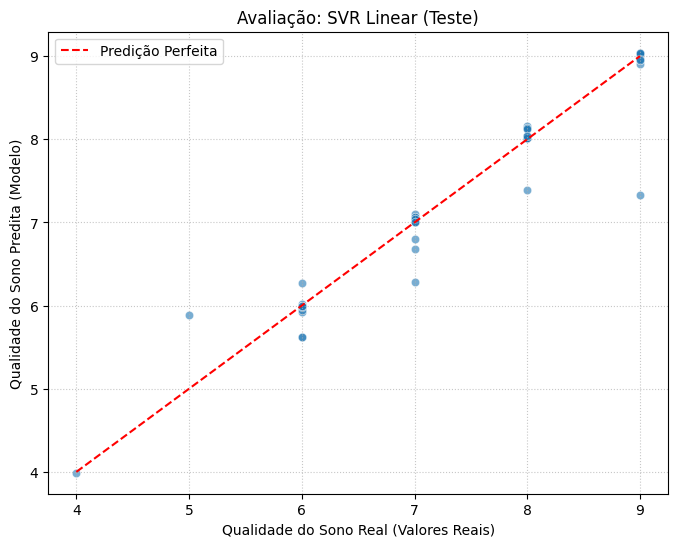

In [ ]:
plot_real_vs_pred(y_test, y_pred_test, title="Avaliação: SVR Linear (Teste)")

In [ ]:
import joblib

joblib.dump(model, 'svm_final_sleep.joblib')

colunas_treino = X_train.columns.tolist()
joblib.dump(colunas_treino, 'colunas.joblib')

['colunas.joblib']